### Importing the Libraries:

In [63]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

### Importing the Training data:

In [64]:
train_data = pd.read_csv("SalaryData_Train.csv") 
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Importing the Testing data:

In [65]:
test_data = pd.read_csv("SalaryData_Test.csv")
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


### EDA & Preprocesing the data:

In [66]:
cat_data = train_data.select_dtypes(exclude='number')
cat_data

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
30156,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
30157,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
30158,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
30159,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


#### Label-Encoding every categorical column:

In [67]:
cat_columns = list(cat_data.columns)
label_encoder = preprocessing.LabelEncoder()
for col in cat_columns:
    train_data[col]= label_encoder.fit_transform(train_data[col])
    test_data[col]= label_encoder.fit_transform(test_data[col])

In [68]:
# Removing the educationno column as it was giving the same information as education column
train_data = train_data.loc[:, train_data.columns != "educationno"]
test_data = test_data.loc[:, test_data.columns != "educationno"]
train_data

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,2,3,0,4,1,0,0,13,37,0
2,38,2,11,0,5,1,4,1,0,0,40,37,0
3,53,2,1,2,5,0,2,1,0,0,40,37,0
4,28,2,9,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,4,0,3,4,1,0,0,20,37,0


In [69]:
x_train_df = train_data.loc[:, train_data.columns != "Salary"]
y_train_df = train_data.loc[:, train_data.columns == "Salary"]
x_test_df = test_data.loc[:, test_data.columns != "Salary"]
y_test_df = test_data.loc[:, test_data.columns == "Salary"]

In [70]:
x_train = x_train_df.values
y_train = y_train_df.values.flatten()
x_test= x_test_df.values
y_test = y_test_df.values.flatten()

### Building the MultinomialNB model:

In [71]:
mnb = MultinomialNB()

In [72]:
pred_mnb = mnb.fit(x_train,y_train).predict(x_test)

In [73]:
cm_mnb = pd.DataFrame(confusion_matrix(y_test,pred_mnb))
pd.crosstab(y_test,pred_mnb) 
print(f"Accuracy of Multinomial model is {round(np.mean(pred_mnb==y_test)*100,2)}%")

Accuracy of Multinomial model is 77.5%


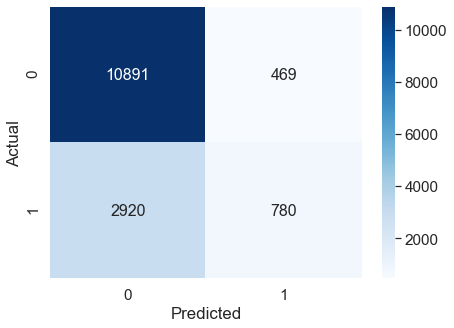

In [74]:
cm_mnb.index.name = 'Actual'
cm_mnb.columns.name = 'Predicted'
plt.figure(figsize = (7,5))
sns.set(font_scale=1.4)
sns.heatmap(cm_mnb, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt="g")

### Building the GaussianNB model:

In [75]:
gnb = GaussianNB()

In [76]:
pred_gnb = gnb.fit(x_train,y_train).predict(x_test)

In [77]:
# Confusion matrix GaussianNB model
cm_gnb = pd.DataFrame(confusion_matrix(y_test,pred_gnb))
pd.crosstab(y_test,pred_gnb) 
print(f"Accuracy of Gaussian model is {round(np.mean(pred_gnb==y_test)*100,2)}%")

Accuracy of Gaussian model is 79.15%


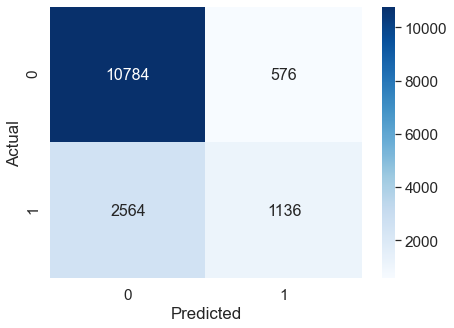

In [81]:
cm_gnb.index.name = 'Actual'
cm_gnb.columns.name = 'Predicted'
plt.figure(figsize = (7,5))
sns.set(font_scale=1.4)
sns.heatmap(cm_gnb, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt="g")

###### Observation: We see that the Gausian model is better for this dataset. The multionomialNB model is more suitable for the discrete variables where we have a count vectorizer (Text analysis)